In [4]:
import pandas as pd

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

matches.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


Exploratory Data Analysis(EDA) with Python (pandas+matplotlib)
We’ll explore:

1) Basic info about the dataset
2) Number of seasons & matches
3) Number of matches per season
4) Top teams by matches played
5) Toss vs match winners
6) Venues analysis
7) Team performance

1.Basic Exploration of matches Data

In [4]:
# First, check sturcture of the data
matches.info() # This gives us the number of rows, columns, null values, and datatypes — a habit for any data analyst.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

2. How many IPL seasons are there?

In [5]:
matches['season'].nunique()

17

3. Matches played in each season

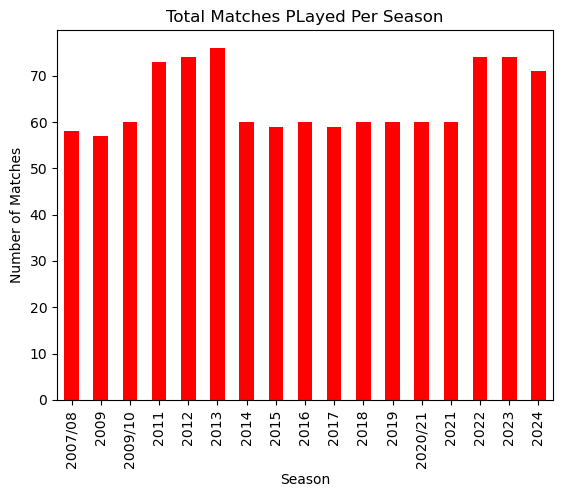

In [6]:
import matplotlib.pyplot as plt
season_match_counts = matches['season'].value_counts().sort_index()

# Plot
season_match_counts.plot(kind='bar',color='red')
plt.title("Total Matches PLayed Per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=90)
plt.show()

4. Top teams by matches played

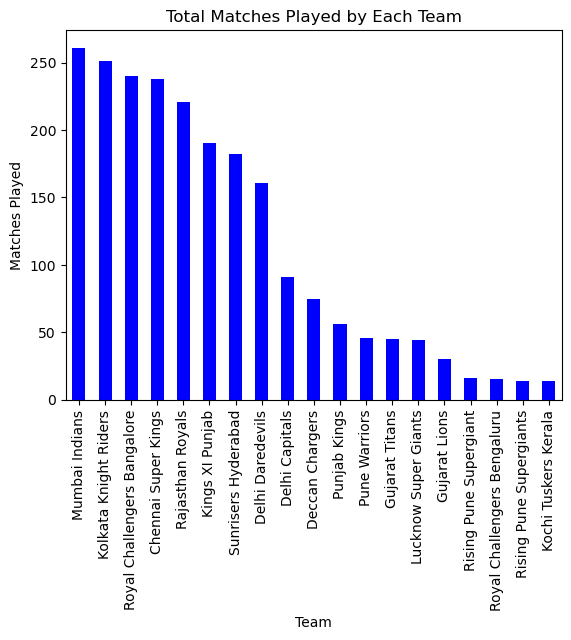

In [19]:
teams = pd.concat([matches['team1'],matches['team2']])
team_match_counts = teams.value_counts()

# Plot
team_match_counts.plot(kind='bar',color='blue')
plt.title("Total Matches Played by Each Team")
plt.xlabel("Team")
plt.ylabel("Matches Played")
plt.xticks(rotation=90)
plt.show()

EDA Part B: Toss Decisions & Match Winners

We’ll explore:
1) Toss winner vs match winner (does toss matter?)
2) Toss decision (bat or field)
3) Most successful venues
4) Team with highest win % per season (optional)

1. Toss Winner vs match winner

In [21]:
# How often toss winner = match winner
toss_match_winner = matches[matches['toss_winner']==matches['winner']]
percentage = len(toss_match_winner) / len(matches) * 100

print(f"{percentage:.2f}% of the time,the toss winner also won the match.")

50.59% of the time,the toss winner also won the match.


2. Toss Decision Trend (bat or field)

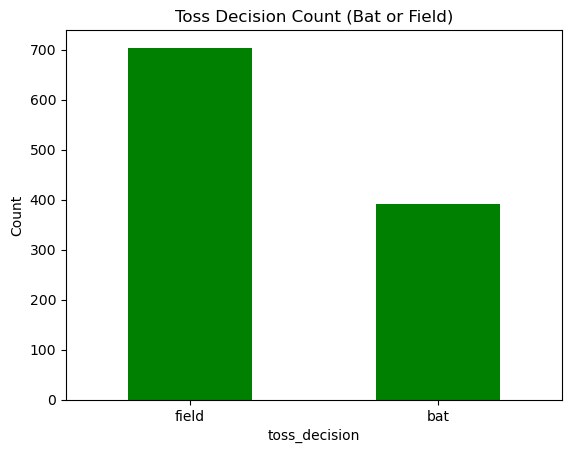

In [22]:
toss_decisions = matches['toss_decision'].value_counts()

# Plot
toss_decisions.plot(kind='bar',color='green')
plt.title("Toss Decision Count (Bat or Field)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

EDA Part C: deliveries.csv - Ball-by-Ball Deep Analysis
Objective: Explore player performance, team strategies, and match actions using ball-by-ball data.

In [3]:
import pandas as pd

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

matches.head()
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


Most Runs by a Batsman(All Time)

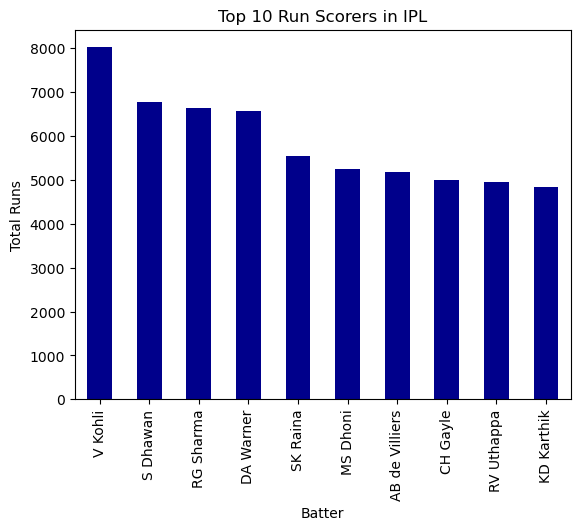

In [9]:
import matplotlib.pyplot as plt  # ✅ import here if not done already

top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Plot
top_batsmen.plot(kind='bar', color='darkblue')
plt.title("Top 10 Run Scorers in IPL")
plt.ylabel("Total Runs")
plt.xlabel("Batter")
plt.xticks(rotation=90)
plt.show()


3. Top Bowlers by Wickets Taken

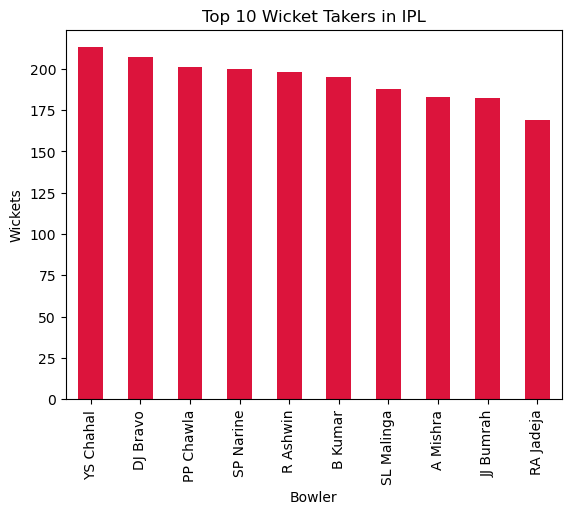

In [12]:
# Filter only rows where a player is dismissed
dismissals = deliveries[deliveries['player_dismissed'].notnull()]

# Count wickets by bowler
top_bowlers = dismissals['bowler'].value_counts().head(10)

# Plot
top_bowlers.plot(kind='bar',color='crimson')
plt.title("Top 10 Wicket Takers in IPL")
plt.ylabel("Wickets")
plt.xlabel("Bowler")
plt.xticks(rotation=90)
plt.show()

4. Most Sixes by a Batsman

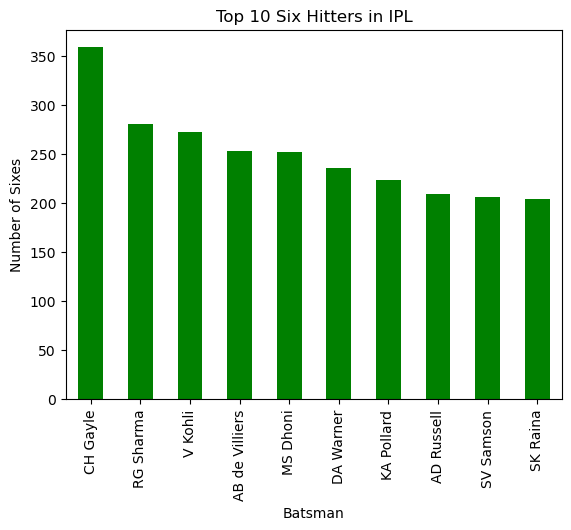

In [15]:
sixes = deliveries[deliveries['batsman_runs']==6]

top_six_hitters = sixes['batter'].value_counts().head(10)

# Plot
top_six_hitters.plot(kind='bar',color='green')
plt.title("Top 10 Six Hitters in IPL")
plt.ylabel("Number of Sixes")
plt.xlabel("Batsman")
plt.xticks(rotation=90)
plt.show()

5. Team-wise Total Runs Scored

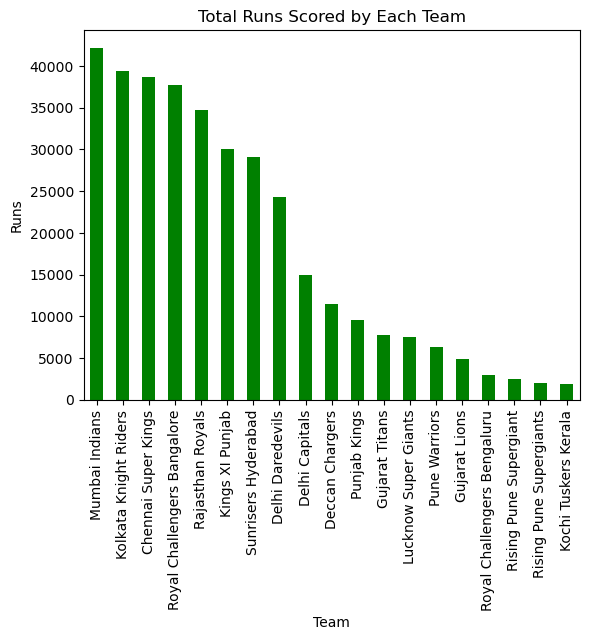

In [7]:
# Total runs scored by each team
team_runs=deliveries.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Plotting
team_runs.plot(kind='bar',color='green')
plt.title("Total Runs Scored by Each Team")
plt.ylabel("Runs")
plt.xlabel("Team")
plt.xticks(rotation=90)
plt.show()

6. Best Batting Strike Rate (Minimum 500 balls faced)

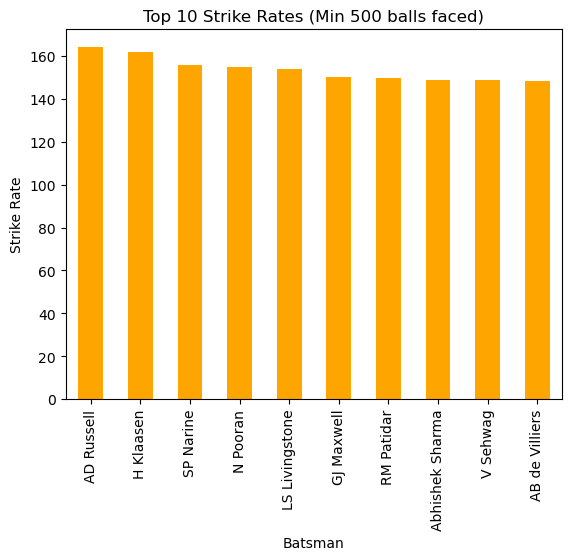

In [10]:
# Total runs per batsman
runs = deliveries.groupby('batter')['batsman_runs'].sum()

# Balls faced per batsman
balls = deliveries.groupby('batter').size()

# Strike Rate Calculation
strike_rate = (runs / balls) * 100

# Filter batsmen who faced at least 500 balls
qualified = strike_rate[balls >= 500].sort_values(ascending=False).head(10)

# Plot
qualified.plot(kind='bar', color='orange')
plt.title("Top 10 Strike Rates (Min 500 balls faced)")
plt.ylabel("Strike Rate")
plt.xlabel("Batsman")
plt.xticks(rotation=90)
plt.show()


Step 7: Extras Conceded by Bowling Teams

Let’s see which bowling teams have conceded the most extras (wides + no balls + byes + leg byes).

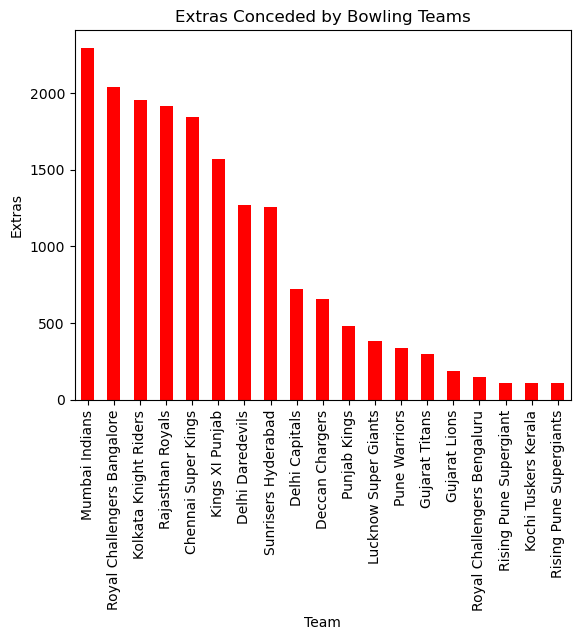

In [12]:
extras = deliveries.groupby('bowling_team')['extra_runs'].sum().sort_values(ascending=False)

# Plot
extras.plot(kind='bar', color='red')
plt.title("Extras Conceded by Bowling Teams")
plt.ylabel("Extras")
plt.xlabel("Team")
plt.xticks(rotation=90)
plt.show()


8. Season-wise Match Counts

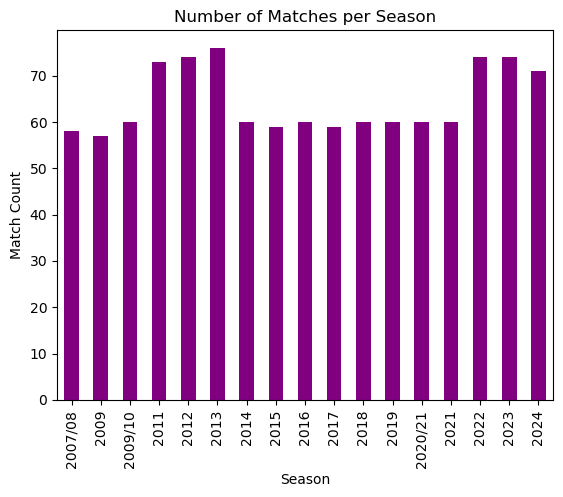

In [13]:
# We will analyze how many matches were played each season.

season_match_counts = matches['season'].value_counts().sort_index()

# Plot
season_match_counts.plot(kind='bar',color='purple')
plt.title("Number of Matches per Season")
plt.ylabel("Match Count")
plt.xlabel("Season")
plt.xticks(rotation=90)
plt.show()

9: Matches Played vs Matches Won by Each Team

This is a cool advanced step. We’ll:
1) Count how many matches each team played
2) Count how many they won
3) Plot both side by side

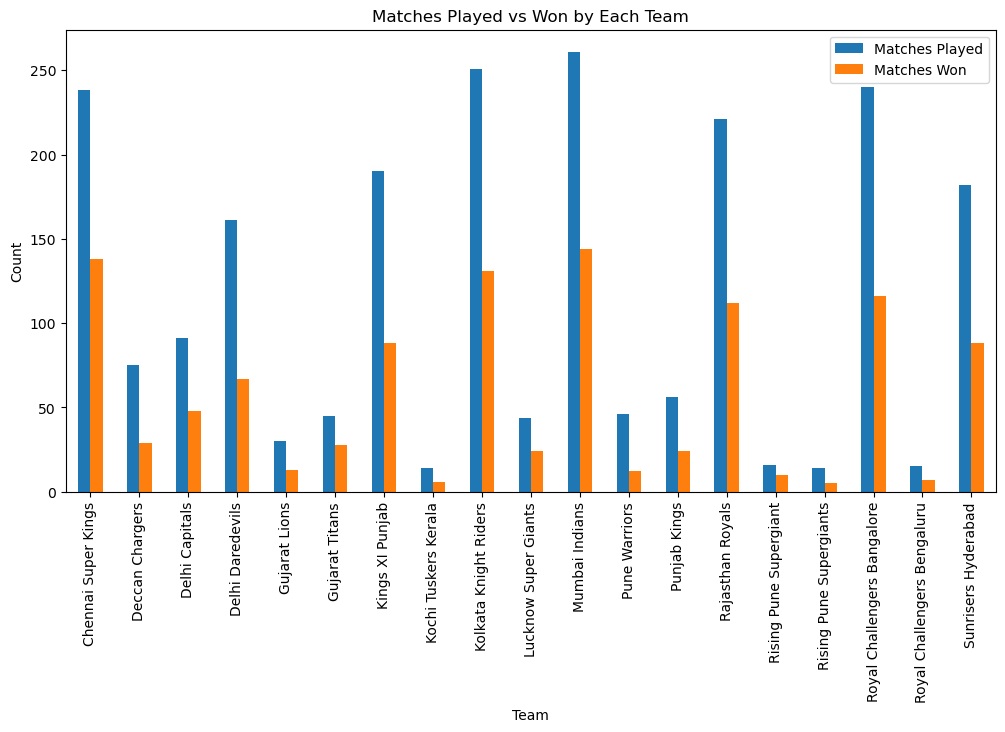

In [15]:
# Matches played (team1+team2)
teams_played = pd.concat([matches['team1'], matches['team2']])
team_match_counts = teams_played.value_counts()

#Matches won 
team_wins = matches['winner'].value_counts()

# Combine both into one DataFrame
match_win_df=pd.DataFrame({
    'Matches Played': team_match_counts,
    'Matches Won': team_wins
})

# Plot
match_win_df.plot(kind='bar', figsize=(12,6))
plt.title("Matches Played vs Won by Each Team")
plt.ylabel("Count")
plt.xlabel("Team")
plt.xticks(rotation=90)
plt.show()

In [18]:
teams_played = pd.concat([matches['team1'], matches['team2']])
print(teams_played)

0       Royal Challengers Bangalore
1                   Kings XI Punjab
2                  Delhi Daredevils
3                    Mumbai Indians
4             Kolkata Knight Riders
                   ...             
1090            Sunrisers Hyderabad
1091          Kolkata Knight Riders
1092               Rajasthan Royals
1093               Rajasthan Royals
1094          Kolkata Knight Riders
Length: 2190, dtype: object


10. Toss Decision Analysis

let's explore what teams choose after winning the toss:

Do they bat or field first?

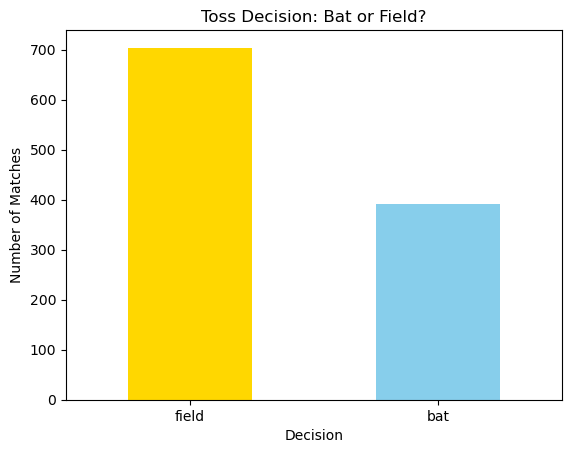

In [20]:
# Count of tos  decisions
toss_decision_counts = matches['toss_decision']. value_counts()

# Plot
toss_decision_counts.plot(kind='bar',color=['gold','skyblue'])
plt.title("Toss Decision: Bat or Field?")
plt.xlabel("Decision")
plt.ylabel("Number of Matches")
plt.xticks(rotation=0)
plt.show()

11. Win % Batting First vs Chasing

Checking how often teams win when they:
1) Bat first
2) Chase

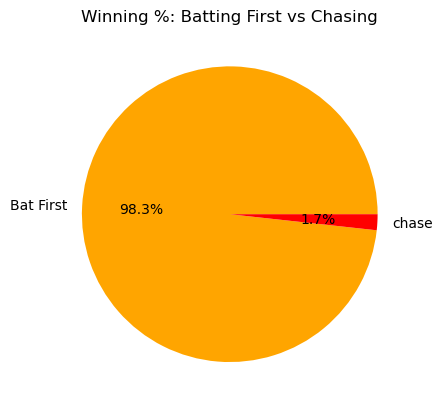

In [24]:
# Create a new column for match result: bat first or chase
matches['win_by']=matches.apply(lambda row: 'Bat First' if row['result_margin']>0  else 'chase',axis=1)

# Count the number of wins by each type
win_counts = matches['win_by'].value_counts()

# Plot
win_counts.plot(kind='pie',autopct='%1.1f%%',colors=['orange','red'])
plt.title("Winning %: Batting First vs Chasing")
plt.ylabel('')
plt.show()

12. Venue-wise Match Insights (Team Dominance)

Analyze:
1) Total number of matches at each venue
2) Which teams dominate at each ground

AttributeError: module 'matplotlib.pyplot' has no attribute 'titles'

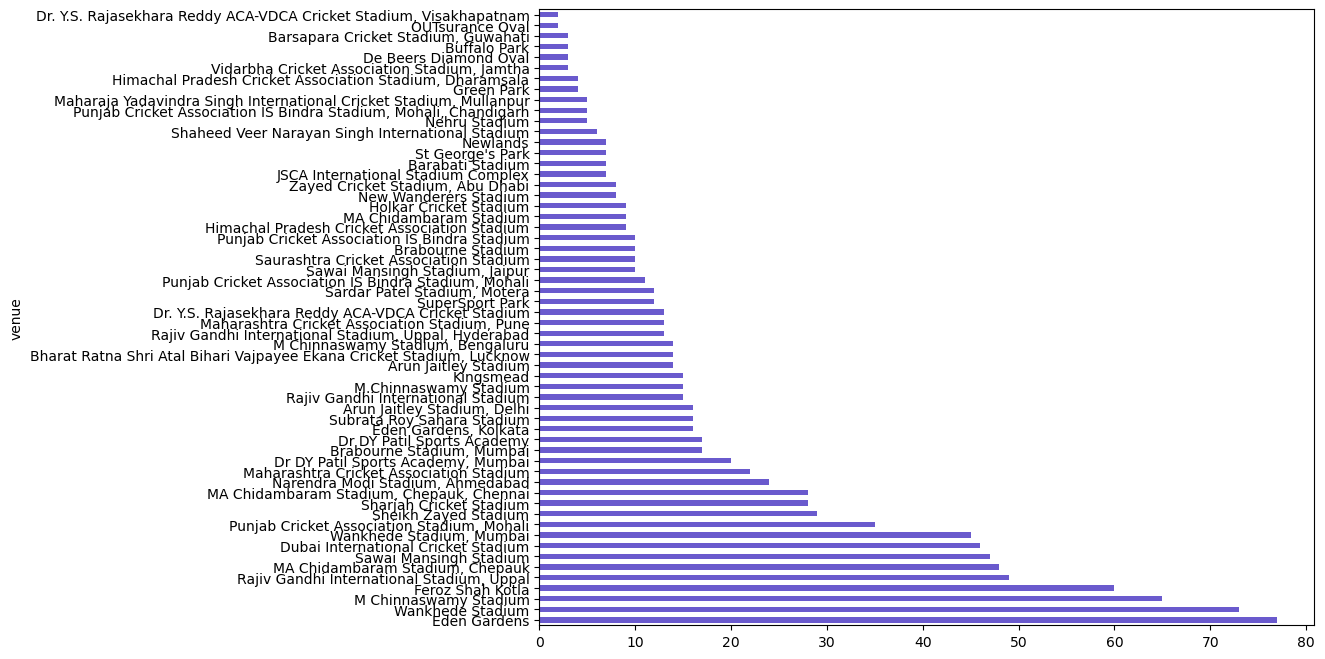

In [32]:
# Part A: Total Matches per venue

import matplotlib.pyplot as plt  # ✅ import here if not done already
venue_counts = matches['venue'].value_counts()

# Plot
venue_counts.plot(kind='barh',figsize=(10,8),color='slateblue')
plt.titles("Number of Matches at Each Venue")
plt.xlabel("Match Count")
plt.ylabel("Venue")
plt.gca().invert_yaxis() # To show the highest value on top
plt.show()

In [33]:
# Part B: Which Team Wins Most at a Given Venue?

venue_team_wins = matches.groupby(['venue','winner']).size().reset_index(name='win_count')

# Top winning team per venue
top_teams_at_venue = venue_team_wins.sort_values('win_count',ascending=False).drop_duplicates('venue')
print(top_teams_at_venue[['venue','winner','win_count']])

                                                 venue  \
88                                        Eden Gardens   
360                                   Wankhede Stadium   
169                    MA Chidambaram Stadium, Chepauk   
300                             Sawai Mansingh Stadium   
152                              M Chinnaswamy Stadium   
104                                   Feroz Shah Kotla   
272          Rajiv Gandhi International Stadium, Uppal   
249         Punjab Cricket Association Stadium, Mohali   
260                 Rajiv Gandhi International Stadium   
372                           Wankhede Stadium, Mumbai   
178           MA Chidambaram Stadium, Chepauk, Chennai   
72                 Dubai International Cricket Stadium   
210                   Narendra Modi Stadium, Ahmedabad   
233       Punjab Cricket Association IS Bindra Stadium   
166                              M.Chinnaswamy Stadium   
96                               Eden Gardens, Kolkata   
22   Bharat Ra

13. Top Bowlers-Wickets & Economy Rate

Part A: Top 10 Wicket-Takers

Part B: Best Economy Rate(min 200 overs bowled)

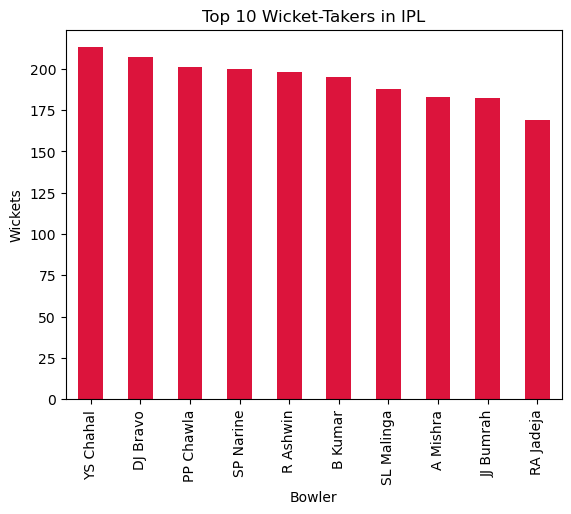

In [35]:
# Part A: 
# Drop rows where no player was dismissed
wickets = deliveries[deliveries['player_dismissed'].notnull()]

# Count dismissals by bowler
top_wicket_takers = wickets['bowler'].value_counts().head(10)

# Plot
top_wicket_takers.plot(kind='bar',color='crimson')
plt.title("Top 10 Wicket-Takers in IPL")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.xticks(rotation=90)
plt.show()

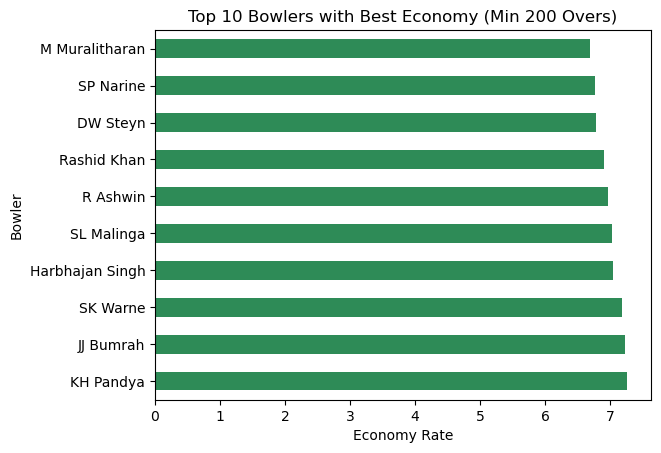

In [39]:
# PartB:
# Calculate total runs and total balls bowled by each bowler
bowler_stats = deliveries.groupby('bowler').agg({
    'total_runs': 'sum',
    'ball': 'count'
})

# Convert balls to overs
bowler_stats['overs'] = bowler_stats['ball'] / 6

# Economy = runs per over
bowler_stats['economy'] = bowler_stats['total_runs'] / bowler_stats['overs']

# Filter bowlers who bowled at least 200 overs (1200 balls)
qualified_bowlers = bowler_stats[bowler_stats['ball'] >= 1200]

# Top 10 best economies (lower is better)
best_economy = qualified_bowlers.sort_values('economy').head(10)

# Plot
best_economy['economy'].plot(kind='barh', color='seagreen')
plt.title("Top 10 Bowlers with Best Economy (Min 200 Overs)")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.gca().invert_yaxis()
plt.show()


14. Player of the Match Analysis

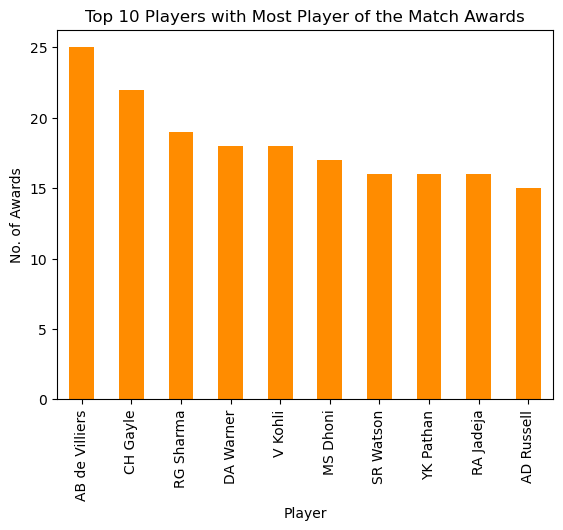

In [41]:
# Count number of awards per player
top_players = matches['player_of_match'].value_counts().head(10)

# Plot
top_players.plot(kind='bar', color='darkorange')
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.xlabel("Player")
plt.ylabel("No. of Awards")
plt.xticks(rotation=90)
plt.show()


Most Awarded Player per Season

In [42]:
# Group by season and player, then count
season_awards = matches.groupby(['season', 'player_of_match']).size().reset_index(name='award_count')

# Get top awarded player per season
top_per_season = season_awards.sort_values('award_count', ascending=False).drop_duplicates('season')

print(top_per_season[['season', 'player_of_match', 'award_count']])


      season  player_of_match  award_count
133     2011         CH Gayle            6
28   2007/08         SE Marsh            5
253     2013       MEK Hussey            5
386     2016          V Kohli            5
188     2012         CH Gayle            5
707     2023      YBK Jaiswal            4
319     2015        DA Warner            4
285     2014       GJ Maxwell            4
622     2022    Kuldeep Yadav            4
462     2018      Rashid Khan            4
121  2009/10     SR Tendulkar            4
475     2019       AD Russell            4
592     2021       RD Gaikwad            4
419     2017  NM Coulter-Nile            3
80      2009        YK Pathan            3
709     2024  Abhishek Sharma            3
515  2020/21   AB de Villiers            3


15. Head-to-Head Analysis Between Teams

In [43]:
# Filter matches with valid winners (ignore abandoned games)
valid_matches = matches[matches['winner'].notnull()]

# Create head-to-head dataframe
head_to_head = valid_matches.groupby(['team1', 'team2', 'winner']).size().reset_index(name='win_count')

# Display top few rows
head_to_head.sort_values('win_count', ascending=False).head(10)


,team1,team2,winner,win_count
298,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,12
16,Chennai Super Kings,Mumbai Indians,Mumbai Indians,12
198,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,12
21,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,11
156,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,11
23,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,10
294,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,10
167,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,10
152,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,10
15,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,10


Step 16:Bonus Advanced Insights

Par A :

In [45]:
# Filter matches where result is 'tie'
super_over_matches = matches[matches['result'] == 'tie']

print("Total Super Over Matches:", len(super_over_matches))
super_over_matches[['season', 'team1', 'team2', 'winner']]


Total Super Over Matches: 14


,season,team1,team2,winner
66,2009,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals
130,2009/10,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab
328,2013,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
342,2013,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
416,2014,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals
475,2015,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab
610,2017,Gujarat Lions,Mumbai Indians,Mumbai Indians
705,2019,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals
746,2019,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians
757,2020/21,Delhi Capitals,Kings XI Punjab,Delhi Capitals


Part B: Most Dismissals by a fielder(excluding wicketkeepers)

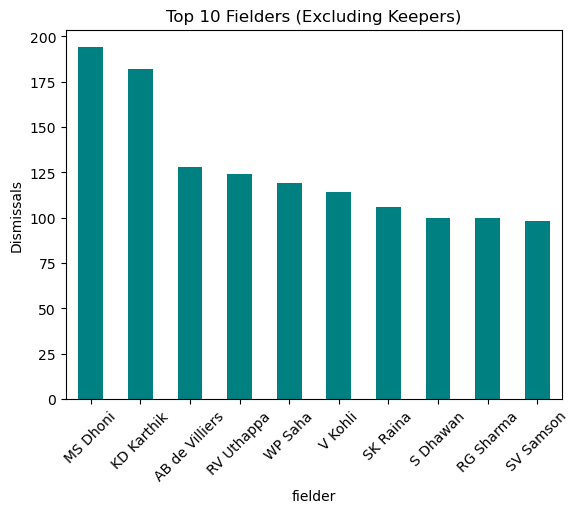

In [46]:
# Exclude wicketkeepers (they mostly appear in 'dismissal_kind' as 'caught')
fielders = deliveries[~deliveries['dismissal_kind'].isin(['caught and bowled', 'bowled', 'lbw', 'run out'])]

fielder_dismissals = fielders['fielder'].value_counts().head(10)

# Plot
fielder_dismissals.plot(kind='bar', color='teal')
plt.title("Top 10 Fielders (Excluding Keepers)")
plt.ylabel("Dismissals")
plt.xticks(rotation=45)
plt.show()


 C. Which Team Chases Better? (Win % while chasing) 

C:\Users\shiva\AppData\Local\Temp\ipykernel_26492\2452950504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed['chasing'] = completed['toss_decision'].apply(lambda x: 'chasing' if x == 'field' else 'batting')


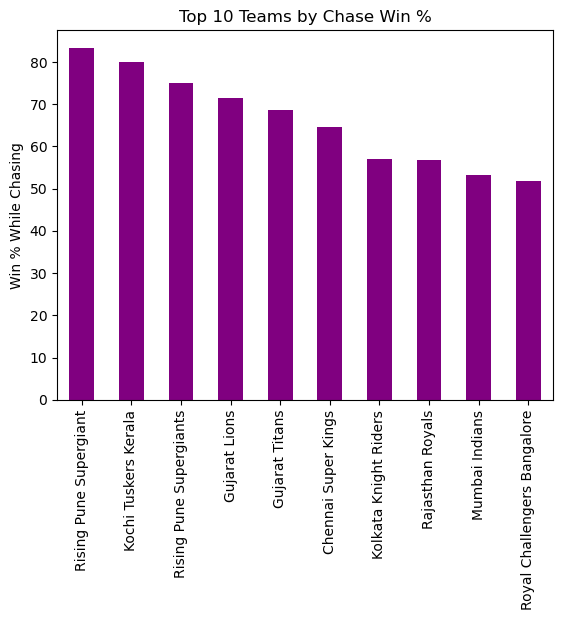

In [48]:
# Filter matches with a clear winner
completed = matches[matches['winner'].notnull()]

# Add new column: whether team chased or not
completed['chasing'] = completed['toss_decision'].apply(lambda x: 'chasing' if x == 'field' else 'batting')

# Filter only chasing teams who won
chase_wins = completed[(completed['chasing'] == 'chasing') & (completed['toss_winner'] == completed['winner'])]

# Group by winner and count
chase_win_counts = chase_wins['winner'].value_counts()

# Total chases per team
total_chases = completed[completed['toss_decision'] == 'field']['toss_winner'].value_counts()

# Chase win rate
chase_win_rate = (chase_win_counts / total_chases * 100).sort_values(ascending=False).dropna().head(10)

# Plot
chase_win_rate.plot(kind='bar', color='purple')
plt.title("Top 10 Teams by Chase Win %")
plt.ylabel("Win % While Chasing")
plt.xticks(rotation=90)
plt.show()
